In [3]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('wdbc.csv', header=None)
data = data.drop([0], axis=1)
data.columns = range(data.shape[1])
cls = data[0]
features = data.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(features, cls, test_size=0.2, stratify=cls)

In [4]:
y_train.value_counts()

B    285
M    170
Name: 0, dtype: int64

In [5]:
y_test.value_counts()

B    72
M    42
Name: 0, dtype: int64

# (b)i. Supervised Learning: Train an L1-penalized SVM to classify the data.

In [6]:
# Normalize data
from sklearn.preprocessing import normalize
features = pd.DataFrame(normalize(features))
data = pd.concat([cls, features], axis=1)
data.columns = range(data.shape[1])
cls_label = {'B':0,'M':1}
for i in range(data.shape[0]):
    data.loc[i, 0] = cls_label.get(data.loc[i, 0])
cls = data[0]
data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,1,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,1,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,1,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037
5,1,0.013945,0.017586,0.092486,0.534398,0.000143,0.000190,0.000177,0.000091,0.000234,...,0.017328,0.026602,0.115818,0.830664,0.000201,0.000588,0.000600,0.000195,0.000446,0.000139
6,1,0.009483,0.010382,0.062147,0.540411,0.000049,0.000057,0.000059,0.000038,0.000093,...,0.011889,0.014373,0.079607,0.834520,0.000075,0.000134,0.000197,0.000100,0.000159,0.000043
7,1,0.012712,0.019313,0.083631,0.535813,0.000110,0.000153,0.000087,0.000055,0.000204,...,0.015818,0.026091,0.102545,0.831674,0.000153,0.000341,0.000248,0.000144,0.000296,0.000107
8,1,0.014200,0.023834,0.095577,0.567784,0.000139,0.000211,0.000203,0.000102,0.000257,...,0.016920,0.033567,0.116004,0.807547,0.000186,0.000590,0.000589,0.000225,0.000478,0.000117
9,1,0.014365,0.027716,0.096808,0.548661,0.000137,0.000276,0.000262,0.000098,0.000234,...,0.017397,0.046900,0.112580,0.820167,0.000214,0.001220,0.001274,0.000255,0.000503,0.000239


In [35]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

train_accuracy, train_precision_B, train_recall_B, train_fscore_B, train_precision_M, train_recall_M, train_fscore_M, train_auc=0, 0, 0, 0, 0, 0, 0, 0
test_accuracy, test_precision_B, test_recall_B, test_fscore_B, test_precision_M, test_recall_M, test_fscore_M, test_auc=0, 0, 0, 0, 0, 0, 0, 0
for m in range(30):
#     print('M = %d:' %(m+1))
    X_train, X_test, y_train, y_test = train_test_split(features, cls, test_size=0.2, stratify=cls)

    C_range = np.logspace(-2, 3, 6)
    param_grid = dict(C=C_range)
    svc = LinearSVC(penalty='l1', dual=False, random_state=42)
    grid = GridSearchCV(svc, param_grid=param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    best_C = grid.best_params_['C']
#     print('The best number of penalty parameter C chosen by 5-fold cross-validation is:', best_C)
    
    svc = LinearSVC(penalty='l1', dual=False, C=best_C, random_state=42).fit(X_train, y_train)
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    df_train = svc.decision_function(X_train)
    df_test = svc.decision_function(X_test)
    
    train_accuracy += accuracy_score(y_train, y_pred_train)
    train_precision_B += precision_score(y_train, y_pred_train, pos_label=0)
    train_recall_B += recall_score(y_train, y_pred_train, pos_label=0)
    train_fscore_B += f1_score(y_train, y_pred_train, pos_label=0)
    train_precision_M += precision_score(y_train, y_pred_train, pos_label=1)
    train_recall_M += recall_score(y_train, y_pred_train, pos_label=1)
    train_fscore_M += f1_score(y_train, y_pred_train, pos_label=1)
    fpr1, tpr1, thresholds1 = roc_curve(y_train, df_train)
    train_auc += auc(fpr1, tpr1)
    
    test_accuracy += accuracy_score(y_test, y_pred_test)
    test_precision_B += precision_score(y_test, y_pred_test, pos_label=0)
    test_recall_B += recall_score(y_test, y_pred_test, pos_label=0)
    test_fscore_B += f1_score(y_test, y_pred_test, pos_label=0)
    test_precision_M += precision_score(y_test, y_pred_test, pos_label=1)
    test_recall_M += recall_score(y_test, y_pred_test, pos_label=1)
    test_fscore_M += f1_score(y_test, y_pred_test, pos_label=1)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, df_test)
    test_auc += auc(fpr2, tpr2)

In [36]:
from prettytable import PrettyTable
print('Over 30 runs:')
mix = PrettyTable(["Attributes of training set", "values"])
mix.align["Attributes of training set"] = "l"
mix.add_row(["Accuracy",train_accuracy/30])
mix.add_row(["Precision of class 'B'",train_precision_B/30])
mix.add_row(["Recall of class 'B'", train_recall_B/30])
mix.add_row(["F-score of class 'B'", train_fscore_B/30])
mix.add_row(["Precision of class 'M'",train_precision_M/30])
mix.add_row(["Recall of class 'M'", train_recall_M/30])
mix.add_row(["F-score of class 'M'", train_fscore_M/30])
mix.add_row(["AUC", train_auc/30])
print(mix)

tab = PrettyTable(["Attributes of test set", "values"])
tab.align["Attributes of test set"] = "l"
tab.add_row(["Accuracy",test_accuracy/30])
tab.add_row(["Precision of class 'B'",test_precision_B/30])
tab.add_row(["Recall of class 'B'", test_recall_B/30])
tab.add_row(["F-score of class 'B'", test_fscore_B/30])
tab.add_row(["Precision of class 'M'",test_precision_M/30])
tab.add_row(["Recall of class 'M'", test_recall_M/30])
tab.add_row(["F-score of class 'M'", test_fscore_M/30])
tab.add_row(["AUC", test_auc/30])
print(tab)

Over 30 runs:
+----------------------------+--------------------+
| Attributes of training set |       values       |
+----------------------------+--------------------+
| Accuracy                   | 0.9681318681318681 |
| Precision of class 'B'     | 0.9724320521624656 |
| Recall of class 'B'        | 0.9768421052631578 |
| F-score of class 'B'       | 0.9746201397195214 |
| Precision of class 'M'     | 0.960934924249296  |
| Recall of class 'M'        | 0.9535294117647057 |
| F-score of class 'M'       | 0.9571843629018468 |
| AUC                        | 0.9960784313725491 |
+----------------------------+--------------------+
+------------------------+--------------------+
| Attributes of test set |       values       |
+------------------------+--------------------+
| Accuracy               | 0.9511695906432748 |
| Precision of class 'B' | 0.9615330392468606 |
| Recall of class 'B'    | 0.9615740740740738 |
| F-score of class 'B'   | 0.9613876102793656 |
| Precision of class 'M' |

This is the result of the L1-penalized SVM model trained in the 30th run.
For training set:
The confusion matrixis:
 [[277   8]
 [  9 161]]


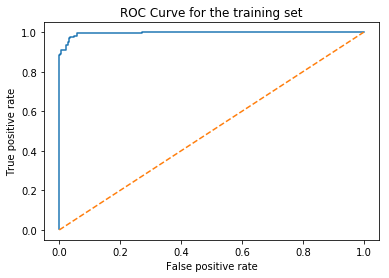

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Plot ROC curve of the SVM in the last run
print('This is the result of the L1-penalized SVM model trained in the 30th run.')
print('For training set:')
print('The confusion matrixis:\n', confusion_matrix(y_train, y_pred_train))

plt.plot(fpr1,tpr1)
plt.title('ROC Curve for the training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

For test set:
The confusion matrixis:
 [[71  1]
 [ 1 41]]


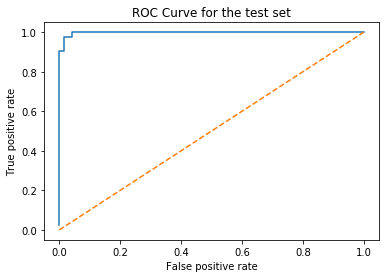

In [38]:
print('For test set:')
print('The confusion matrixis:\n', confusion_matrix(y_test, y_pred_test))

plt.plot(fpr2,tpr2)
plt.title('ROC Curve for the test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# ii. Semi-Supervised Learning/ Self-training

In [43]:
train_accuracy, train_precision_B, train_recall_B, train_fscore_B, train_precision_M, train_recall_M, train_fscore_M, train_auc=0, 0, 0, 0, 0, 0, 0, 0
test_accuracy, test_precision_B, test_recall_B, test_fscore_B, test_precision_M, test_recall_M, test_fscore_M, test_auc=0, 0, 0, 0, 0, 0, 0, 0

for m in range(30):
    X_train, X_test, y_train, y_test = train_test_split(features, cls, test_size=0.2, stratify=cls)
    labeled_train, unlabeled_train, train_label, _ = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)
    train_label=train_label.values
    labeled_train=labeled_train.values
    unlabeled_train=unlabeled_train.values

    C_range = np.logspace(-2, 3, 12)
    param_grid = dict(C=C_range)
    svc = LinearSVC(penalty='l1', dual=False, random_state=42)
    grid = GridSearchCV(svc, param_grid=param_grid, cv=5)
    grid.fit(labeled_train, train_label)
    best_C=grid.best_params_['C']

    # B<0 M>0
    while(len(unlabeled_train)>0):
        svc=LinearSVC(penalty='l1',dual=False, C=best_C, random_state=42)
        svc.fit(labeled_train,train_label)
        decf=svc.decision_function(unlabeled_train)
        if max(decf)>abs(min(decf)):
            index=np.argmax(decf)
            train_label=np.hstack([train_label,1])
            labeled_train=np.vstack([labeled_train,unlabeled_train[index]])
        else:
            index=np.argmin(decf)
            train_label=np.hstack([train_label,0])
            labeled_train=np.vstack([labeled_train,unlabeled_train[index]])
        unlabeled_train=np.delete(unlabeled_train,index,axis=0)
        
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    df_train = svc.decision_function(X_train)
    df_test = svc.decision_function(X_test)
    
    train_accuracy += accuracy_score(y_train, y_pred_train)
    train_precision_B += precision_score(y_train, y_pred_train, pos_label=0)
    train_recall_B += recall_score(y_train, y_pred_train, pos_label=0)
    train_fscore_B += f1_score(y_train, y_pred_train, pos_label=0)
    train_precision_M += precision_score(y_train, y_pred_train, pos_label=1)
    train_recall_M += recall_score(y_train, y_pred_train, pos_label=1)
    train_fscore_M += f1_score(y_train, y_pred_train, pos_label=1)
    fpr1, tpr1, thresholds1 = roc_curve(y_train, df_train)
    train_auc += auc(fpr1, tpr1)
    
    test_accuracy += accuracy_score(y_test, y_pred_test)
    test_precision_B += precision_score(y_test, y_pred_test, pos_label=0)
    test_recall_B += recall_score(y_test, y_pred_test, pos_label=0)
    test_fscore_B += f1_score(y_test, y_pred_test, pos_label=0)
    test_precision_M += precision_score(y_test, y_pred_test, pos_label=1)
    test_recall_M += recall_score(y_test, y_pred_test, pos_label=1)
    test_fscore_M += f1_score(y_test, y_pred_test, pos_label=1)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, df_test)
    test_auc += auc(fpr2, tpr2)

In [44]:
print('Over 30 runs:')
mix = PrettyTable(["Attributes of training set", "values"])
mix.align["Attributes of training set"] = "l"
mix.add_row(["Accuracy",train_accuracy/30])
mix.add_row(["Precision of class 'B'",train_precision_B/30])
mix.add_row(["Recall of class 'B'", train_recall_B/30])
mix.add_row(["F-score of class 'B'", train_fscore_B/30])
mix.add_row(["Precision of class 'M'",train_precision_M/30])
mix.add_row(["Recall of class 'M'", train_recall_M/30])
mix.add_row(["F-score of class 'M'", train_fscore_M/30])
mix.add_row(["AUC", train_auc/30])
print(mix)

tab = PrettyTable(["Attributes of test set", "values"])
tab.align["Attributes of test set"] = "l"
tab.add_row(["Accuracy",test_accuracy/30])
tab.add_row(["Precision of class 'B'",test_precision_B/30])
tab.add_row(["Recall of class 'B'", test_recall_B/30])
tab.add_row(["F-score of class 'B'", test_fscore_B/30])
tab.add_row(["Precision of class 'M'",test_precision_M/30])
tab.add_row(["Recall of class 'M'", test_recall_M/30])
tab.add_row(["F-score of class 'M'", test_fscore_M/30])
tab.add_row(["AUC", test_auc/30])
print(tab)

Over 30 runs:
+----------------------------+--------------------+
| Attributes of training set |       values       |
+----------------------------+--------------------+
| Accuracy                   | 0.9527472527472528 |
| Precision of class 'B'     | 0.957306990022186  |
| Recall of class 'B'        | 0.967953216374269  |
| F-score of class 'B'       | 0.9625231747606827 |
| Precision of class 'M'     | 0.9454577979271623 |
| Recall of class 'M'        | 0.9272549019607841 |
| F-score of class 'M'       | 0.9360404834463464 |
| AUC                        | 0.9908565531475747 |
+----------------------------+--------------------+
+------------------------+--------------------+
| Attributes of test set |       values       |
+------------------------+--------------------+
| Accuracy               | 0.9438596491228068 |
| Precision of class 'B' | 0.9522010205544222 |
| Recall of class 'B'    | 0.9597222222222218 |
| F-score of class 'B'   | 0.9557176623198816 |
| Precision of class 'M' |

This is the result of the L1-penalized SVM model trained in the 30th run.
For training set:
The confusion matrixis:
 [[278   7]
 [ 12 158]]


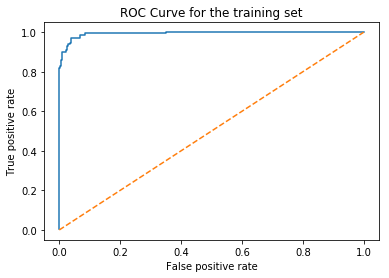

In [45]:
print('This is the result of the L1-penalized SVM model trained in the 30th run.')
print('For training set:')
print('The confusion matrixis:\n', confusion_matrix(y_train, y_pred_train))

plt.plot(fpr1,tpr1)
plt.title('ROC Curve for the training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

For test set:
The confusion matrixis:
 [[68  4]
 [ 3 39]]


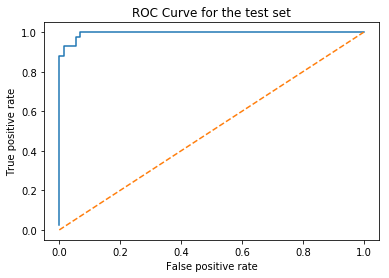

In [46]:
print('For test set:')
print('The confusion matrixis:\n', confusion_matrix(y_test, y_pred_test))

plt.plot(fpr2,tpr2)
plt.title('ROC Curve for the test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# iii.Unsupervised Learning

## How do you make sure that the algorithm was not trapped in a local minimum?
Since k=2, that is, k is not large, we can avoid the algorithm trapped in a local minimum by initializing cluster centroids randomly multiple times. In KMeans of sklearn, the parameter "n_init" means number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. By setting n_init large, we can make sure that the algorithm was not trapped in a local minimum.

In [51]:
from sklearn.cluster import KMeans
train_accuracy, train_precision_B, train_recall_B, train_fscore_B, train_precision_M, train_recall_M, train_fscore_M, train_auc=0, 0, 0, 0, 0, 0, 0, 0
test_accuracy, test_precision_B, test_recall_B, test_fscore_B, test_precision_M, test_recall_M, test_fscore_M, test_auc=0, 0, 0, 0, 0, 0, 0, 0
for m in range(30):
    data = pd.read_csv('wdbc.csv', header=None)
    data = data.drop([0], axis=1)
    data.columns = range(data.shape[1])
    cls = data[0]
    X_train, X_test, y_train, y_test = train_test_split(features, cls, test_size=0.2, stratify=cls)
    y_train=y_train.values
    # initialize the algoritm randomly
    km = KMeans(n_clusters=2, init='random', n_init=1000).fit(X_train)
    # Transform X to a cluster-distance space (2 columns)
    clus_dis = km.transform(X_train)
    closest_0 = clus_dis[:,0].argsort()[:30]
    closest_1 = clus_dis[:,1].argsort()[:30]

    cluster0={'M':0,'B':0}
    cluster1={'M':0,'B':0}
    for x in closest_0:
        cluster0[y_train[x]] += 1
    for x in closest_1:
        cluster1[y_train[x]] += 1
    cluster_major_class = {0:max(cluster0.keys(), key = (lambda x: cluster0[x])),1:max(cluster1.keys(), key = (lambda x: cluster1[x]))}
    inverse_cmc = dict(zip(cluster_major_class.values(), cluster_major_class.keys()))

    # First, get the cluster that kmeans predicts
    # Then, get the cluster label assigned by majority poll
    y_pred_train = list(map(lambda x: cluster_major_class[x], km.predict(X_train)))
    y_pred_test = list(map(lambda x: cluster_major_class[x], km.predict(X_test)))

    proba = km.transform(X_train)
    train_accuracy += accuracy_score(y_train, y_pred_train)
    train_precision_B += precision_score(y_train, y_pred_train, pos_label='B')
    train_recall_B += recall_score(y_train, y_pred_train, pos_label='B')
    train_fscore_B += f1_score(y_train, y_pred_train, pos_label='B')
    train_precision_M += precision_score(y_train, y_pred_train, pos_label='M')
    train_recall_M += recall_score(y_train, y_pred_train, pos_label='M')
    train_fscore_M += f1_score(y_train, y_pred_train, pos_label='M')
    fpr1, tpr1, thresholds1 = roc_curve(y_train, proba[:,inverse_cmc['B']], pos_label='M')
    train_auc += auc(fpr1, tpr1)

    prob = km.transform(X_test)
    test_accuracy += accuracy_score(y_test, y_pred_test)
    test_precision_B += precision_score(y_test, y_pred_test, pos_label='B')
    test_recall_B += recall_score(y_test, y_pred_test, pos_label='B')
    test_fscore_B += f1_score(y_test, y_pred_test, pos_label='B')
    test_precision_M += precision_score(y_test, y_pred_test, pos_label='M')
    test_recall_M += recall_score(y_test, y_pred_test, pos_label='M')
    test_fscore_M += f1_score(y_test, y_pred_test, pos_label='M')
    fpr2, tpr2, thresholds2 = roc_curve(y_test, prob[:,inverse_cmc['B']], pos_label='M')
    test_auc += auc(fpr2, tpr2)

In [52]:
print('Over 30 runs:')
mix = PrettyTable(["Attributes of training set", "values"])
mix.align["Attributes of training set"] = "l"
mix.add_row(["Accuracy",train_accuracy/30])
mix.add_row(["Precision of class 'B'",train_precision_B/30])
mix.add_row(["Recall of class 'B'", train_recall_B/30])
mix.add_row(["F-score of class 'B'", train_fscore_B/30])
mix.add_row(["Precision of class 'M'",train_precision_M/30])
mix.add_row(["Recall of class 'M'", train_recall_M/30])
mix.add_row(["F-score of class 'M'", train_fscore_M/30])
mix.add_row(["AUC", train_auc/30])
print(mix)

tab = PrettyTable(["Attributes of test set", "values"])
tab.align["Attributes of test set"] = "l"
tab.add_row(["Accuracy",test_accuracy/30])
tab.add_row(["Precision of class 'B'",test_precision_B/30])
tab.add_row(["Recall of class 'B'", test_recall_B/30])
tab.add_row(["F-score of class 'B'", test_fscore_B/30])
tab.add_row(["Precision of class 'M'",test_precision_M/30])
tab.add_row(["Recall of class 'M'", test_recall_M/30])
tab.add_row(["F-score of class 'M'", test_fscore_M/30])
tab.add_row(["AUC", test_auc/30])
print(tab)

Over 30 runs:
+----------------------------+--------------------+
| Attributes of training set |       values       |
+----------------------------+--------------------+
| Accuracy                   | 0.8874725274725278 |
| Precision of class 'B'     | 0.8600961017196365 |
| Recall of class 'B'        |        0.98        |
| F-score of class 'B'       | 0.9160801786448363 |
| Precision of class 'M'     | 0.9564592795313139 |
| Recall of class 'M'        | 0.7323529411764704 |
| F-score of class 'M'       | 0.8291851845380965 |
| AUC                        | 0.9107657378740972 |
+----------------------------+--------------------+
+------------------------+--------------------+
| Attributes of test set |       values       |
+------------------------+--------------------+
| Accuracy               | 0.8885964912280703 |
| Precision of class 'B' | 0.8599854227421101 |
| Recall of class 'B'    | 0.985185185185185  |
| F-score of class 'B'   | 0.9180793880143376 |
| Precision of class 'M' |

This is the result of the Kmeans in the 30th run.
For training set:
The confusion matrixis:
 [[282   3]
 [ 53 117]]


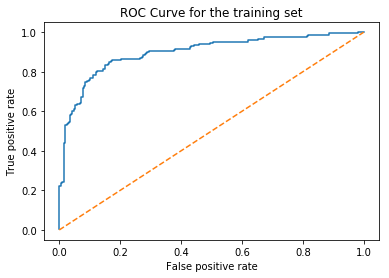

In [53]:
print('This is the result of the Kmeans in the 30th run.')
print('For training set:')
print('The confusion matrixis:\n', confusion_matrix(y_train, y_pred_train))

plt.plot(fpr1,tpr1)
plt.title('ROC Curve for the training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

For test set:
The confusion matrixis:
 [[70  2]
 [ 9 33]]


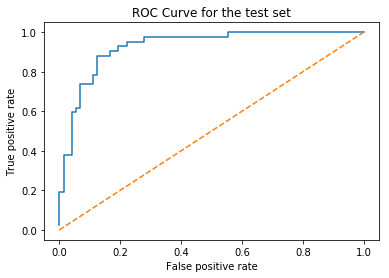

In [54]:
print('For test set:')
print('The confusion matrixis:\n', confusion_matrix(y_test, y_pred_test))

plt.plot(fpr2,tpr2)
plt.title('ROC Curve for the test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# iv. Spectral Clustering: clustering based on kernels.

Spectral Clustering is a graph-based clustering method. It divides a weighted undirected graph into two or more optimal subgraphs, making the interior of the subgraph as similar as possible. The distance between the maps should be as far apart as possible. In multivariate statistics and the clustering of data, spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.
The kernel k-means problem is an extension of the k-means problem where the input data points are mapped non-linearly into a higher-dimensional feature space via a kernel function.

Spectral clustering can identify the sample space of arbitrary shape and converge to the global optimal solution. The basic idea is to use the similarity matrix of the sample data (Laplace matrix) to perform feature decomposition to obtain the feature vector for clustering.

In [39]:
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

train_accuracy, train_precision_B, train_recall_B, train_fscore_B, train_precision_M, train_recall_M, train_fscore_M, train_auc=0, 0, 0, 0, 0, 0, 0, 0
test_accuracy, test_precision_B, test_recall_B, test_fscore_B, test_precision_M, test_recall_M, test_fscore_M, test_auc=0, 0, 0, 0, 0, 0, 0, 0

for m in range(30):
    data = pd.read_csv('wdbc.csv', header=None)
    data = data.drop([0], axis=1)
    data.columns = range(data.shape[1])
    cls = data[0]
    features = pd.DataFrame(normalize(data.iloc[:, 1:]))
    X_train, X_test, y_train, y_test = train_test_split(features, cls, test_size=0.2, stratify=cls)
    y_train=y_train.values

    # initialize the algoritm randomly
    km = SpectralClustering(n_clusters=2,affinity='rbf',random_state=0).fit(X_train)
    labels = km.labels_
    cluster0_index = np.ndarray.flatten(np.argwhere(labels == 0))
    cluster1_index = np.ndarray.flatten(np.argwhere(labels == 1))
    X_train.index = range(X_train.shape[0])
    cluster0_data = X_train.iloc[cluster0_index,:]
    cluster1_data = X_train.iloc[cluster1_index,:]
    centroid0 = cluster0_data.mean()
    centroid1 = cluster1_data.mean()
    vector_c0 = np.array(centroid0)
    vector_c1 = np.array(centroid1)

    def calculate_distance(x,y):
        return np.sqrt(np.sum(np.square(x-y)))

    dist0 = []
    dist1 = []
    dist_0 = []
    dist_1 = []
    for x in X_train.index:
        vec = X_train.loc[x].values
        dist0.append(calculate_distance(vec, vector_c0))
        dist1.append(calculate_distance(vec, vector_c1))

    closest_0 = np.array(dist0).argsort()[:30]
    closest_1 = np.array(dist1).argsort()[:30]

    cluster0={'M':0,'B':0}
    cluster1={'M':0,'B':0}
    for x in closest_0:
        cluster0[y_train[x]] += 1
    for x in closest_1:
        cluster1[y_train[x]] += 1

    cluster_major_class = {0:max(cluster0.keys(), key = (lambda x: cluster0[x])),1:max(cluster1.keys(), key = (lambda x: cluster1[x]))}
    inverse_cmc = dict(zip(cluster_major_class.values(), cluster_major_class.keys()))

    for x in X_test.index:
        vec_ = X_test.loc[x].values
        dist_0.append(calculate_distance(vec_, vector_c0))
        dist_1.append(calculate_distance(vec_, vector_c1))

    y_pred_train = []
    for i in range(len(dist0)):
        if dist0[i] > dist1[i]:
            y_pred_train.append(cluster_major_class[1])
        else:
            y_pred_train.append(cluster_major_class[0])   

    y_pred_test = []
    for i in range(len(dist_0)):
        if dist_0[i] > dist_1[i]:
            y_pred_test.append(cluster_major_class[1])
        else:
            y_pred_test.append(cluster_major_class[0])

    dist0_array = np.array(dist0)
    dist1_array = np.array(dist1)
    decf_T = np.vstack((dist0_array, dist1_array))
    decf = decf_T.T

    train_accuracy += accuracy_score(y_train, y_pred_train)
    train_precision_B += precision_score(y_train, y_pred_train, pos_label='B')
    train_recall_B += recall_score(y_train, y_pred_train, pos_label='B')
    train_fscore_B += f1_score(y_train, y_pred_train, pos_label='B')
    train_precision_M += precision_score(y_train, y_pred_train, pos_label='M')
    train_recall_M += recall_score(y_train, y_pred_train, pos_label='M')
    train_fscore_M += f1_score(y_train, y_pred_train, pos_label='M')
    fpr1, tpr1, thresholds1 = roc_curve(y_train, decf[:,inverse_cmc['B']], pos_label='M')
    train_auc += auc(fpr1, tpr1)

    dist_0_array = np.array(dist_0)
    dist_1_array = np.array(dist_1)
    dec_T = np.vstack((dist_0_array, dist_1_array))
    decf_ = dec_T.T

    test_accuracy += accuracy_score(y_test, y_pred_test)
    test_precision_B += precision_score(y_test, y_pred_test, pos_label='B')
    test_recall_B += recall_score(y_test, y_pred_test, pos_label='B')
    test_fscore_B += f1_score(y_test, y_pred_test, pos_label='B')
    test_precision_M += precision_score(y_test, y_pred_test, pos_label='M')
    test_recall_M += recall_score(y_test, y_pred_test, pos_label='M')
    test_fscore_M += f1_score(y_test, y_pred_test, pos_label='M')
    fpr2, tpr2, thresholds2 = roc_curve(y_test, decf_[:,inverse_cmc['B']], pos_label='M')
    test_auc += auc(fpr2, tpr2)

In [40]:
from prettytable import PrettyTable
print('Over 30 runs:')
mix = PrettyTable(["Attributes of training set", "values"])
mix.align["Attributes of training set"] = "l"
mix.add_row(["Accuracy",train_accuracy/30])
mix.add_row(["Precision of class 'B'",train_precision_B/30])
mix.add_row(["Recall of class 'B'", train_recall_B/30])
mix.add_row(["F-score of class 'B'", train_fscore_B/30])
mix.add_row(["Precision of class 'M'",train_precision_M/30])
mix.add_row(["Recall of class 'M'", train_recall_M/30])
mix.add_row(["F-score of class 'M'", train_fscore_M/30])
mix.add_row(["AUC", train_auc/30])
print(mix)

tab = PrettyTable(["Attributes of test set", "values"])
tab.align["Attributes of test set"] = "l"
tab.add_row(["Accuracy",test_accuracy/30])
tab.add_row(["Precision of class 'B'",test_precision_B/30])
tab.add_row(["Recall of class 'B'", test_recall_B/30])
tab.add_row(["F-score of class 'B'", test_fscore_B/30])
tab.add_row(["Precision of class 'M'",test_precision_M/30])
tab.add_row(["Recall of class 'M'", test_recall_M/30])
tab.add_row(["F-score of class 'M'", test_fscore_M/30])
tab.add_row(["AUC", test_auc/30])
print(tab)

Over 30 runs:
+----------------------------+--------------------+
| Attributes of training set |       values       |
+----------------------------+--------------------+
| Accuracy                   | 0.8842490842490845 |
| Precision of class 'B'     | 0.8547392344980601 |
| Recall of class 'B'        | 0.9823391812865501 |
| F-score of class 'B'       | 0.9140611654076344 |
| Precision of class 'M'     | 0.9606693497383136 |
| Recall of class 'M'        | 0.7198039215686273 |
| F-score of class 'M'       | 0.8227021041917549 |
| AUC                        | 0.9099016167870656 |
+----------------------------+--------------------+
+------------------------+--------------------+
| Attributes of test set |       values       |
+------------------------+--------------------+
| Accuracy               | 0.8885964912280702 |
| Precision of class 'B' | 0.863144581668487  |
| Recall of class 'B'    | 0.9810185185185182 |
| F-score of class 'B'   | 0.9178737305630867 |
| Precision of class 'M' |

This is the result of the SpectralClustering in the 30th run.
For training set:
The confusion matrixis:
 [[279   6]
 [ 53 117]]


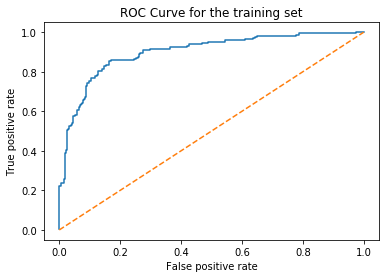

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print('This is the result of the SpectralClustering in the 30th run.')
print('For training set:')
print('The confusion matrixis:\n', confusion_matrix(y_train, y_pred_train))

plt.plot(fpr1,tpr1)
plt.title('ROC Curve for the training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

For test set:
The confusion matrixis:
 [[72  0]
 [ 8 34]]


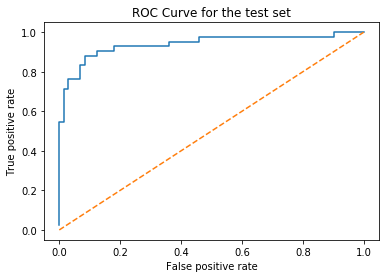

In [42]:
print('For test set:')
print('The confusion matrixis:\n', confusion_matrix(y_test, y_pred_test))

plt.plot(fpr2,tpr2)
plt.title('ROC Curve for the test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# v. Compare the results obtained by the above methods:
Supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.
Unsupervised learning underperforms in such situations. 
In unsupervised learning, spectral clustering works better than Kmeans.